Customer Segmentation

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [216]:
df=pd.read_csv("Customer.csv")
df.head(10)

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Male,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [217]:
df.isnull().sum()

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [218]:
df.dtypes

Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

In [219]:
df.describe()

,Age,Annual Income,Spending Score
count,200.00000,200.000000,200.000000
mean,38.83000,60.535000,50.200000
std,14.01905,26.226474,25.823522
min,18.00000,15.000000,1.000000
25%,28.00000,41.500000,34.750000
50%,36.00000,61.500000,50.000000
75%,49.00000,78.000000,73.000000
max,70.00000,137.000000,99.000000


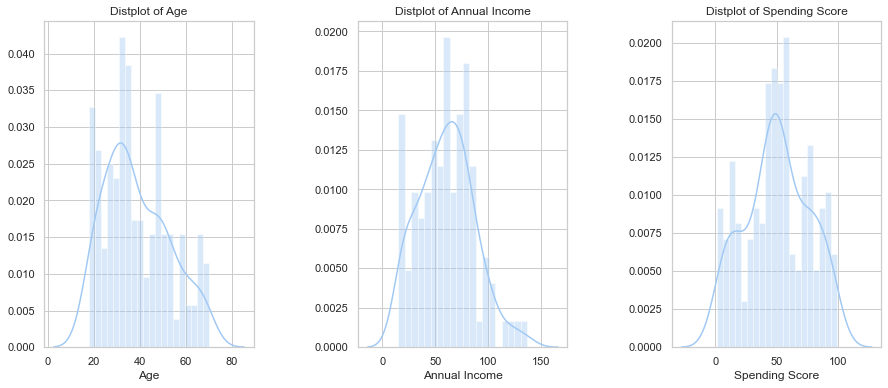

In [220]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=2,wspace=0.5)
    sns.distplot(df[x] , bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

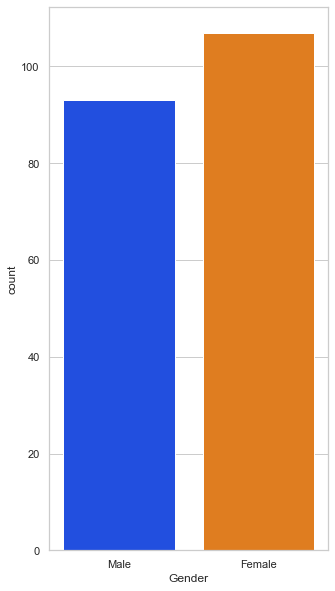

In [221]:
plt.figure(figsize=(5,10))
sns.countplot(x='Gender',data=df,palette='bright')
plt.show()

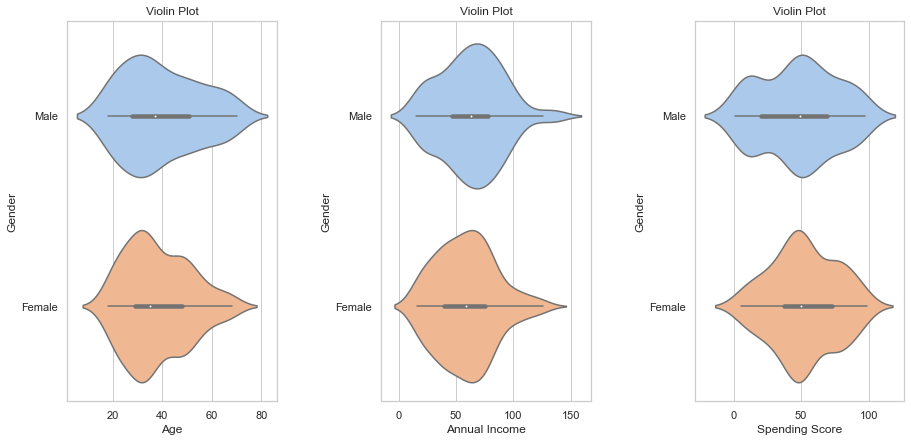

In [222]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Age' , 'Annual Income' , 'Spending Score']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style= 'whitegrid',palette= 'pastel')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols ,y='Gender' , data=df)
    plt.title('Violin Plot')
plt.show()

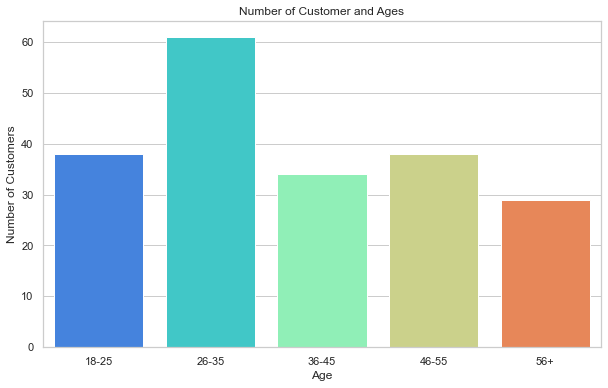

In [223]:
Age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
Age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
Age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
Age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
Age_56_Above = df.Age[df.Age >= 56]

Age_X = ["18-25" , "26-35" ,"36-45" ,"46-55", "56+"]
Age_Y = [len(Age_18_25.values) , len(Age_26_35.values) , len(Age_36_45.values), len(Age_46_55.values) , len(Age_56_Above.values)]

plt.figure(figsize = (10,6))
sns.barplot(x = Age_X , y = Age_Y , palette = "rainbow")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

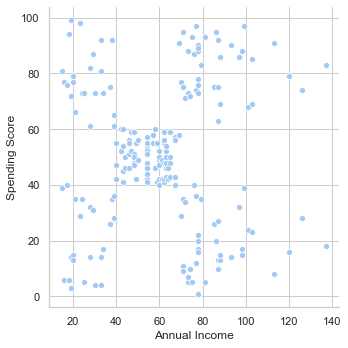

In [224]:
sns.relplot(x="Annual Income",y="Spending Score",data=df)

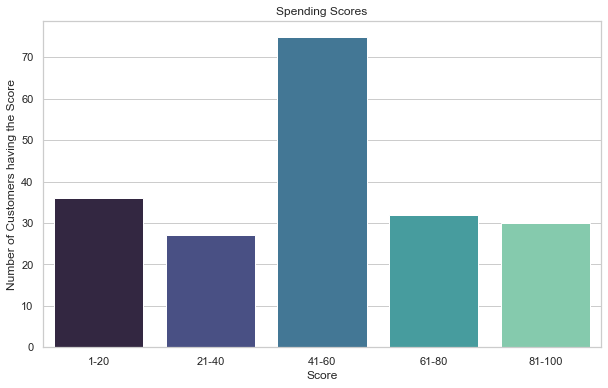

In [225]:
SS_1_20 = df["Spending Score"][(df["Spending Score"] >= 1) & (df["Spending Score"] <= 20)]
SS_21_40 = df["Spending Score"][(df["Spending Score"] >= 21) & (df["Spending Score"] <= 40)]
SS_41_60 = df["Spending Score"][(df["Spending Score"] >= 41) & (df["Spending Score"] <= 60)]
SS_61_80 = df["Spending Score"][(df["Spending Score"] >= 61) & (df["Spending Score"] <= 80)]
SS_81_100 = df["Spending Score"][(df["Spending Score"] >= 81) & (df["Spending Score"] <= 100)]

SS_X = ["1-20" , "21-40" , "41-60" , "61-80" , "81-100"]
SS_Y = [len(SS_1_20.values) , len(SS_21_40.values), len(SS_41_60.values), len(SS_61_80.values), len(SS_81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=SS_X , y=SS_Y , palette="mako")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customers having the Score")
plt.show()

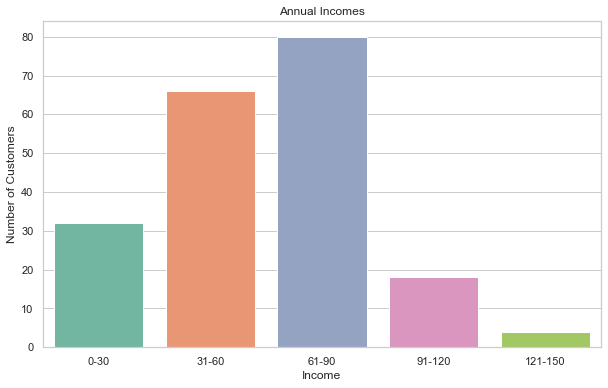

In [226]:
AI_0_30 = df["Annual Income"][(df["Annual Income"] >= 0) & (df["Annual Income"] <= 30)]
AI_31_60=df["Annual Income"][(df["Annual Income"] >= 31) & (df["Annual Income"] <= 60)]
AI_61_90 = df["Annual Income"][(df["Annual Income"] >= 61) & (df["Annual Income"] <= 90)]
AI_91_120=df["Annual Income"][(df["Annual Income"] >= 91) & (df["Annual Income"] <= 120)]
AI_121_150 = df["Annual Income"][(df["Annual Income"] >= 121) & (df["Annual Income"] <= 150)]

AI_X = ["0-30" , "31-60" , "61-90" , "91-120" , "121-150"]
AI_Y = [len(AI_0_30.values) , len(AI_31_60.values) , len(AI_61_90.values) , len(AI_91_120.values) , len(AI_121_150.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=AI_X , y=AI_Y , palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

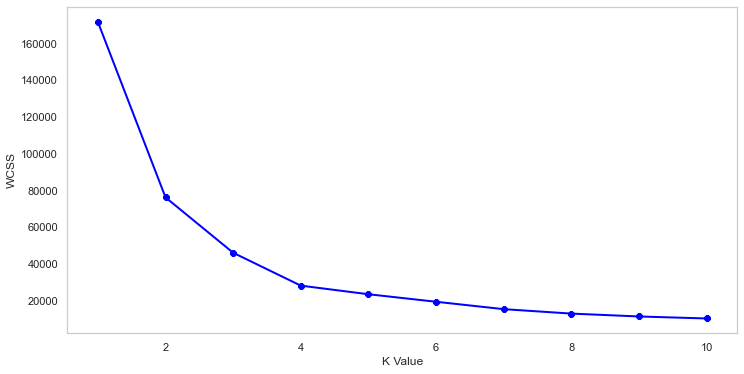

In [227]:
X1 = df.loc[:,["Age" ,"Spending Score"]].values
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color="blue",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [228]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(X1)
print(label)

[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [229]:
print(kmeans.cluster_centers_)

[[43.         15.02083333]
 [30.1754386  82.35087719]
 [55.6122449  48.04081633]
 [27.32608696 49.36956522]]


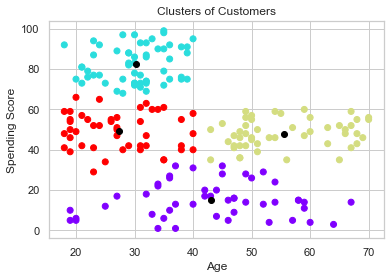

In [230]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

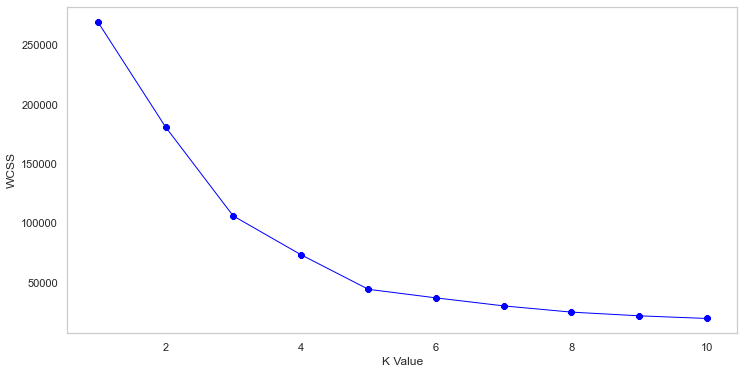

In [231]:
X2 = df.loc[:,["Annual Income" ,"Spending Score"]].values
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=1,color="blue",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [232]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X2)
print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [233]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [88.05714286 17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


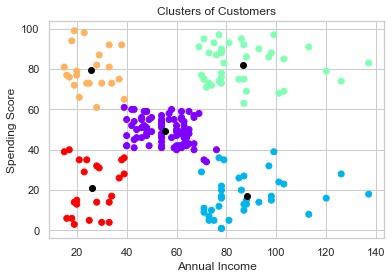

In [234]:
plt.scatter(X2[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

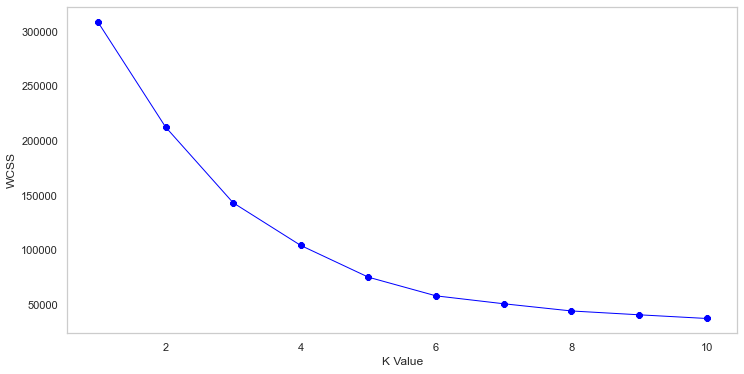

In [235]:
X3 = df.iloc[:,1:]
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=1,color="blue",marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [236]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(X3)
print(label)

[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 4 3 1 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 1 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


In [237]:
print(kmeans.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [43.08860759 55.29113924 49.56962025]
 [25.52173913 26.30434783 78.56521739]
 [32.69230769 86.53846154 82.12820513]
 [40.55555556 87.61111111 17.58333333]]


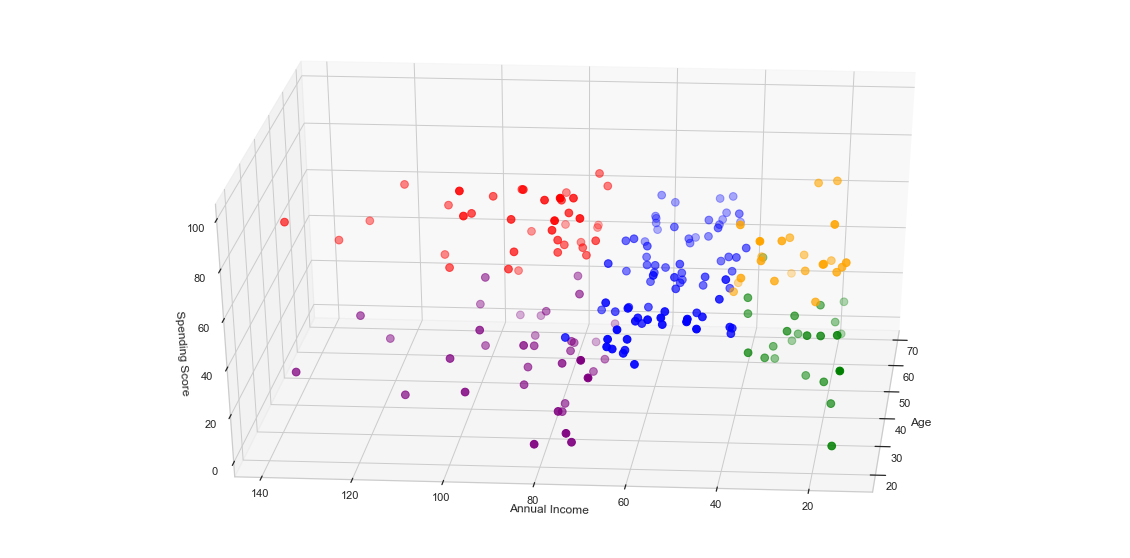

In [239]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
AX = fig.add_subplot(111,projection = '3d')
AX.scatter(df.Age[df.label == 0], df["Annual Income"][df.label == 0], df["Spending Score"][df.label == 0], c='blue', s=60)
AX.scatter(df.Age[df.label == 1], df["Annual Income"][df.label == 1], df["Spending Score"][df.label == 1], c='red', s=60)
AX.scatter(df.Age[df.label == 2], df["Annual Income"][df.label == 2], df["Spending Score"][df.label == 2], c='green', s=60)
AX.scatter(df.Age[df.label == 3], df["Annual Income"][df.label == 3], df["Spending Score"][df.label == 3], c='orange', s=60)
AX.scatter(df.Age[df.label == 4], df["Annual Income"][df.label == 4], df["Spending Score"][df.label == 4], c='purple', s=60)
AX.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income")
AX.set_zlabel("Spending Score")
plt.show()